<a href="https://colab.research.google.com/github/samuelbolugee/PythonDSProjects/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis in Python#
###Written by Samuel B. Olugunna###
Exploratory data analysis (EDA) is a process of analyzing and understanding a dataset by summarizing its main characteristics and identifying patterns, trends, and relationships within the data. It is a vital step in the data science process that helps you get a better understanding of your data and formulate hypotheses for further analysis.

Exploratory Data Analysis refers to all investigatory steps taken on a dataset in order to understand its properties and contents better. Basically, think of it this way: while predictive analysis tells the story the data is communicating to the user, EDA involves "finding the setting, theme, plot, and even characters" of the story.



##How to Perform EDA##
EDA can be performed visually or non-visually. The visual method involves graphs, charts, maps and others, and the aim is to tell the story with few words (and fewer lines of code). 
The non-visual method involves coding, using functions in a preferred programming language to gain insights into what the data is telling us. More often than not (at least with respect to programming), the non-visual method is used to generate the pretty, eye-catching visualizations we see everywhere. A typical example of the aforementioned would be where you use a line of code in Python, say:

```
df.['ClassName'].unique()
```

and then use Seaborn's **countplot()** method to visualize the distribution of unique values across a feature/variable:

```
sns.countplot(df.['ClassName']).unique()
```

However, with visual methods **only** (such as graphs, charts etc.), one would have to resort to visualization tools like Tableau, Power BI, Excel, etc.

Let's skip the stories and jump right in! We'll pick a dataset and try to perform some EDA on it using some Python libraries.

I will be mounting my Google Drive for this task. In it contains the dataset file I'll be using. One can either write code to do this, or click on the fourth icon on the left hand side panel: Files > Mount Drive.

Here's the code to do this (JSYK!):


```
from google.colab import drive
drive.mount('/content/drive')
```



##Importing Required Libraries###

The Python libraries we'll be using for this EDA task are Pandas, NumPy, Matplotlib (specifically, Matplotlib's Pyplot module) and Seaborn.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the Dataset##

Now, we will use the Pandas library to access, load and read the dataset.

The dataset we'll be using for this is the Behavior of the urban traffic of the city of Sao Paulo in Brazil Data Set, obtained from UCI's ML repo, and can be gotten here: https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil#

To do this, we will use:

```
pd.read_csv('Dataset.csv')
```

...where "dataset.csv" is the name of the dataset file you're working with.
Note that you must put the filepath of the dataset you're working with (especially if you're working in Colab). If the dataset file is in the same folder as your notebook or Python script file, then no worries, just use the filename itself.


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/traffic.csv", header = 0, sep = ';', engine = 'python')

You see that ***engine = 'python'*** bit there? That's to prevent Unicode errors when reading the file.

Note that **sep = ;**. This means that the delimiter is not a comma, but a semi-colon.

##What is a delimiter, you ask?##

A delimiter is a character or series of characters that separates strings of text or data into distinct parts. In programming, delimiters are often used to specify the boundaries of a particular piece of data or to separate data elements within a larger string. For example, a comma (,) might be used as a delimiter to separate the values in a list of items, or a tab character might be used to separate the values in a table of data. Delimiters are often used in file formats, such as CSV (comma-separated values) or TSV (tab-separated values), to specify how data should be structured and interpreted. Delimiters can also be used in programming languages to indicate the beginning or end of a block of code or to separate the components of a command or statement.

So, we have to specify what the delimiter in our dataset file is and subsequently, pass it in as an argument to the aforementioned function so that our data can be read properly.

We've read and loaded the data. Now, let's view it.

Before we do, what variable did we save our dataset into?


Yes. df. So, take note of this. We'll be needing this from this moment onwards.

To view the data, we will use a method in Pandas called head().

So, what does it do? Well, let's hear what the Pandas documentation has to say about it.

**This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.**

**For negative values of n, this function returns all rows except the last |n| rows, equivalent to df[:n].**

**If n is larger than the number of rows, this function returns all rows.**

In [ ]:
df.head() # This should give us the first 5 rows, by default.

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


##A small issue...##
Firstly, the Hour (Coded) column is numbered from 1 to 27. The times were recorded in 27 intervals of 30 minutes each from 7:00 am to 8:00pm. Hope this helps. Refer to the UCI link above for more.


Also, in the last column of our data set (Slowness in traffic (%)), we have decimals seperated by commas, rather than full stops. This will be an issue as Python would not read those data items as floating point values, but rather as strings, or worse, as two distinct figures seperated by commas.

The preferred option would be to put the:


```
decimal = ','
```
in the pd.read_csv() method, since pandas.read_csv has a decimal parameter for this. 

However, people have found this incompatible with the Python parsing engine. Also, this parameter would be useless in the pd.read_excel function (that is, if you were reading directly from an Excel .xls or .xlsx file), since there is no provision for it. One could use list comprehensions on the target class of the already existing dataframe, but that is a long method. See [here for more.](https://stackoverflow.com/questions/31700691/convert-commas-decimal-separators-to-dots-within-a-dataframe)

Since we already have a dataframe (from our previous lines), we can just do this:

```
df['ClassName'] = df['ClassName'].str.replace(',', '.').astype(float)
```

Three things are happening here: 
1. The Pandas Series of the target class is being modified by a str.replace() function.
Why? Because the values in the class are strings, not numeric.
2. The values, now resembling decimals (due to our little susbsititution trick) are not quite numeric yet. Luckily, the .astype(float) will help us convert every single value into a floating point value.
3. The end results are now stored in the variable "linking them" (the values in the Series) to the target class of the DataFrame.


Let's see it in action.

In [ ]:
df['Slowness in traffic (%)'] = df['Slowness in traffic (%)'].str.replace(',', '.').astype(float)

In [ ]:
df.head(10) # Let's look at the first 10 rows

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.9
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.3
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.2
8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.6
9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.4


Now, let us look at some basic information about the data. We will achieve this with two commands:


```
df.describe()
```
which generates descriptive statistics such as central tendency, dispersion and shape of a dataset’s distribution, (excluding NaN values). NaN stands for Not A Number and is one of the common ways to represent the missing value in the data. It is a special floating-point value and cannot be converted to any other type than float.

OK, back to where we were. That,...and:

```
df.info()
```
which prints a concise summary of a DataFrame, including the index data type and columns, non-null values and memory usage.
Remember our little trick on the final column of the data set? Check the data type of the values in the column. (Float64, right?)


In [ ]:
df.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


If we want to include categorical variables in our description, we just need to add something short to the above cell of code:

In [ ]:
df.describe(include='all')

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hour (Coded)                           135 non-null    int64  
 1   Immobilized bus                        135 non-null    int64  
 2   Broken Truck                           135 non-null    int64  
 3   Vehicle excess                         135 non-null    int64  
 4   Accident victim                        135 non-null    int64  
 5   Running over                           135 non-null    int64  
 6   Fire vehicles                          135 non-null    int64  
 7   Occurrence involving freight           135 non-null    int64  
 8   Incident involving dangerous freight   135 non-null    int64  
 9   Lack of electricity                    135 non-null    int64  
 10  Fire                                   135 non-null    int64  
 11  Point 

##Duplicate, Missing and Unique Values

Duplicate and missing data can be problematic for data science tasks because they can introduce errors and biases into the data set.

Duplicate data occurs when the same data is recorded multiple times within a data set. This can happen when data is collected from multiple sources or when data is entered manually and mistakes are made. Duplicate data can be problematic because it can inflate the size of the data set, making it more difficult to analyze and interpret. In addition, duplicate data can lead to errors in analysis and modeling, as the same data is counted multiple times, skewing the results.

Missing data, also known as "missing values," refers to data that is not available or has not been recorded. Missing data can be a problem because it can reduce the overall sample size, which can lead to reduced statistical power and accuracy. In addition, missing data can introduce bias into the data set, as the missing data may not be representative of the entire population. This can lead to misleading or incorrect conclusions being drawn from the data.

Both duplicate and missing data can make it more difficult to accurately analyze and interpret data, which can compromise the validity and reliability of data science tasks.

Here's how we deal with duplicate data.



```
#To find the existence of duplicates

df.duplicated().sum()

```

This returns a Boolean Pandas Series denoting duplicate rows. The .sum() is to get the exact number of duplicates. See the [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) for more info on the duplicated() method.

To check for missing values, however. is a different thing, because you are not only checking for missing data, but also replacing missing data with "something".

Here's how we deal with missing data:


```
df.isnull().sum()
```
Now, what happens if you do find missing data? Well, as I said earlier, you'll have to replace it with something. Usually, we could replace them with 0, but you could also use the mean or median of the column(s) where the missing data exists.

```
#Replace null values

df.replace(np.nan,'0',inplace = True) #'inplace' tells you whether to modify the DataFrame or create a new one.

#Check for modifications
df.isnull().sum()
```
Now, there should be no missing data! Let's put it to practice.

**N.B: I replaced all missing values (NaN) with 0, hence the "np.nan, 0" part of the code.**



In [ ]:
#To find the existence of duplicates

df.duplicated().sum()

1

If you do find duplicate data, here's how to remove them:

```
df.drop_duplicates()
```
Check [here](https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/) for full syntax and examples.

In [ ]:
df.drop_duplicates()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,23,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,17.8
131,24,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,18.1
132,25,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,17.7
133,26,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17.4


In [ ]:
#Now, to handle missing data.

df.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

No missing data. That's great! Onwards, onwards...

Unique values are special, in that they tell us something about a particular column of data.

What do they tell us? Well, think about this: if you as a data analyst found out that a data column had 120 unique values, what'd cross your mind? 120 categories, or 120 normal, non-categorized values of data? What if it had 3 or 5 unique values? What of 2?

Here's what I think: unique values ***infer*** the existence of categorical data.

Let's explore the world of unique values.

In [ ]:
#One can find the number of unique values in a particular column of data:
df['Hour (Coded)'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

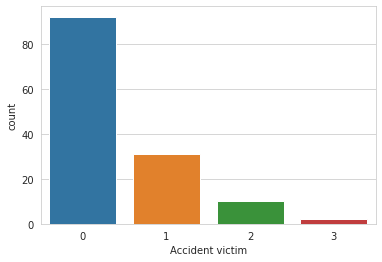

In [ ]:
#One can also plot the unique values!
sns.set_style('whitegrid')
sns.countplot(x = df['Accident victim']) # You do not need to specify the y axis because the y axis will be the count/number of items, since this is a countplot

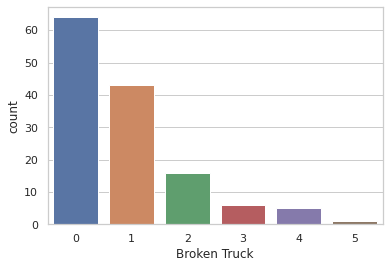

In [ ]:
sns.set_theme(style='whitegrid') #Alternatively, you could also do sns.set_style('whitegrid')
sns.countplot(x = df['Broken Truck'])

We can group by a second variable and plot the values. This helps answer questions like "How many people in X also had/did Y?"

Simply put, this means that you can look at a column in a dataset, say Students, and in that column (with respect to the rest of the data) you can compare with another column such as a categorical one, e.g DoingFurtherMath or a numerical one (this could be done with the help of some conditional logic magic). 

So how do we do it? First, we create a "canvas" using Pyplot from Matplotlib:


```
plt.figure(figsize = (x,y)) # x is our width, y is our height
```
On this canvas shall our "painting" rest! 😆

We will now use Seaborn in two ways: one, to set a theme for our visuals, and two: to perform the plot itself.



```
sns.set_theme(style='whitegrid') 
# Alternatively, you could also do sns.set_style('whitegrid')
sns.countplot(x = df['Hour (Coded)'], data = df, hue = 'Broken Truck')
```
What is our dataset's variable name? Ah, don't tell me you forgot. You're scrolling up to find the variable name for it? 

**df.**

Anyway, we pass that into the "data" parameter, and our x axis is the Hour column. The second variable we're using to group our data (the one passed into the "hue" parameter) is the Broken Truck column.

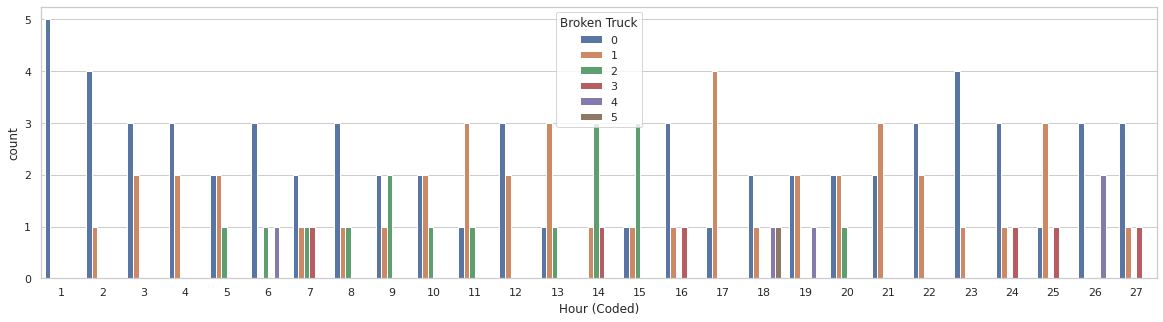

In [ ]:
# We can group by a second variable and plot the values.
# This helps answer questions like "How many people in X also had/did Y?"

plt.figure(figsize = (20,5))
sns.set_theme(style='whitegrid') #Alternatively, you could also do sns.set_style('whitegrid')
sns.countplot(x = df['Hour (Coded)'], data = df, hue = 'Broken Truck')

##Boxplots

A boxplot, also known as a box and whisker plot, is a graph that shows the distribution of a set of data. It is a useful tool for quickly understanding the overall pattern of the data and identifying any outliers (values that are significantly higher or lower than the rest of the data).

To create a boxplot, you first need to find the median, which is the middle value in the data set. Then, you draw a box around the middle 50% of the data, with a line inside the box to mark the median. The ends of the box are called the "quartiles," and they mark the edges of the middle 50% of the data.
The box itself is the interquartile range of the data.

Next, you draw lines, called "whiskers," extending from the box to the minimum and maximum values in the data set. Any values that are significantly higher or lower than the rest of the data are called "outliers," and they are plotted separately as individual points outside the whiskers.

You can visit [this tutorial article from Khan Academy](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review) for an overview of the concept.

I will illustrate how to do it in both Matplotlib and Seaborn.

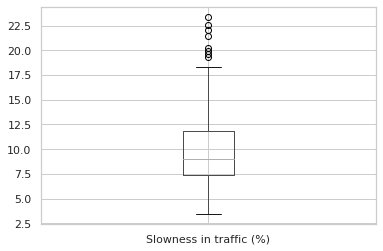

In [ ]:
# Boxplot in Matplotlib

df[['Slowness in traffic (%)']].boxplot() #Note the nested square brackets: this is because Pandas itself does not have a boxplot() method.

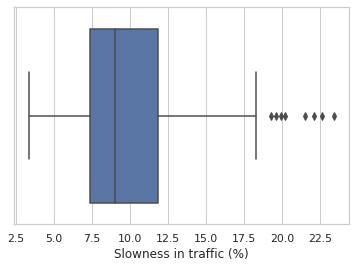

In [ ]:
# Boxplot in Seaborn

sns.boxplot(x = df['Slowness in traffic (%)'], data = df)

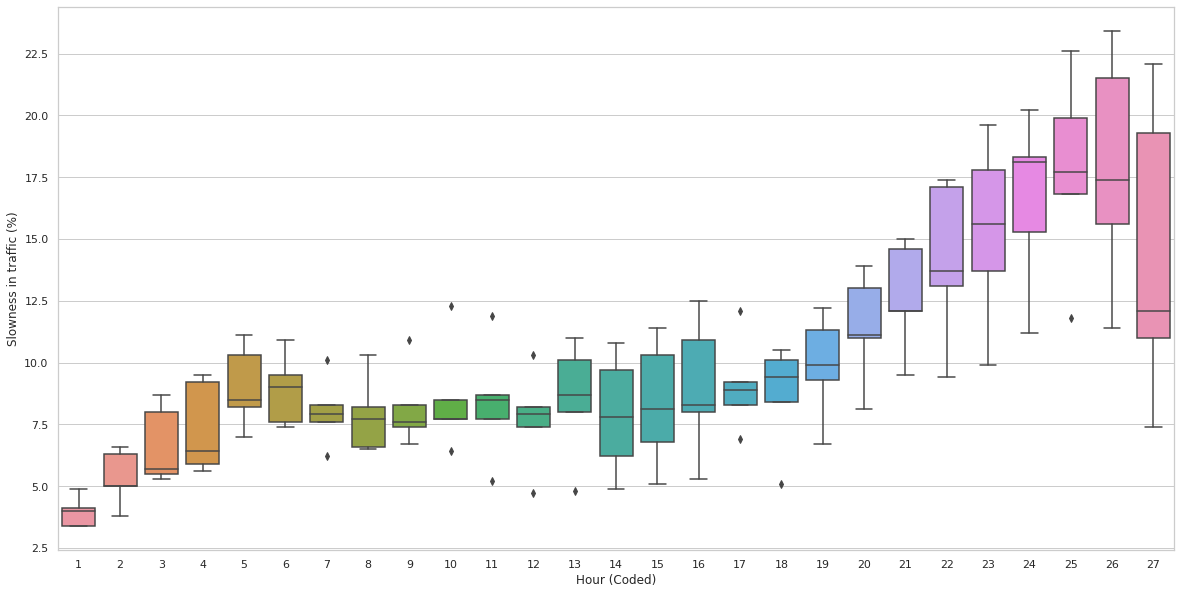

In [ ]:
# Vertical boxplot with nested grouping by two variables:
plt.figure(figsize=(20,10))
sns.boxplot(y = df['Slowness in traffic (%)'], x = df['Hour (Coded)'], data = df)

What does the figure above tell us? 

1. Traffic becomes much more slower from coded hour 18 (3:30p.m).
2. The coded hours 22 to 27 (5:30 p.m. to 8 p.m.) have the most varying increase in slowness in traffic, as well as the highest slowness in traffic.  This means that traffic between these times is not only expected to be very slow, but also less predictable. Outliers in this situation depict a phenomenon that occurs during traffic peaks known as "rush hour" traffic.

We can also perform a groupby() operation on a ceratin column to get more information on any hidden insights amongst groups/categories of data.

First, we pass the column name of what we want to use as our grouping parameter. Then, we pass in square brackets, the column whose data we want to group. Finally, we can perform whatever operation we want on the data groups, e.g .mean(), or .median().

In [ ]:
line = df.groupby('Hour (Coded)')['Slowness in traffic (%)'].mean()
line

Hour (Coded)
1      3.96
2      5.34
3      6.64
4      7.32
5      9.02
6      8.88
7      8.02
8      7.86
9      8.18
10     8.52
11     8.40
12     7.70
13     8.52
14     7.88
15     8.34
16     9.00
17     9.08
18     8.70
19     9.88
20    11.42
21    12.66
22    14.14
23    15.32
24    16.62
25    17.76
26    17.86
27    14.38
Name: Slowness in traffic (%), dtype: float64

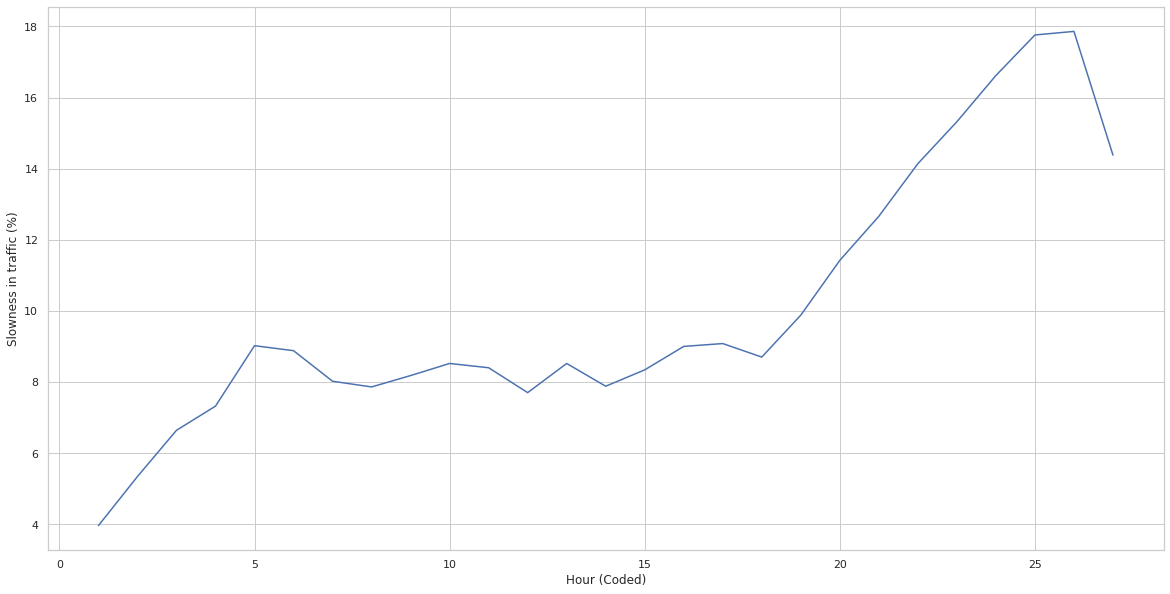

In [ ]:
# We can create a line plot with this data.
# First, we create a "canvas", then we use Seaborn to create a lineplot. The data to be plotted is the line variable, as well as our y-axis.
# It is our y-axis because it is the mena of values from each category of our target variable.
plt.figure(figsize=(20,10))
sns.lineplot(data = line, x = "Hour (Coded)", y = line)

We can also use Matplotlib's Pyplot to achieve this.

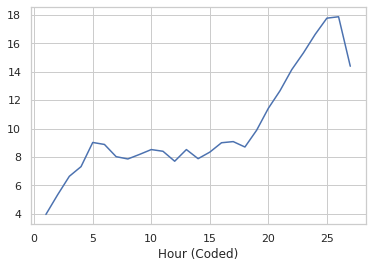

In [ ]:
df.groupby('Hour (Coded)')['Slowness in traffic (%)'].mean().plot(kind = "line")
plt.show()

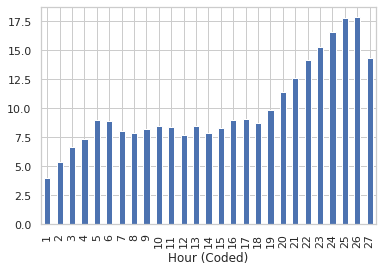

In [ ]:
df.groupby('Hour (Coded)')['Slowness in traffic (%)'].mean().plot(kind = "bar")
plt.show()

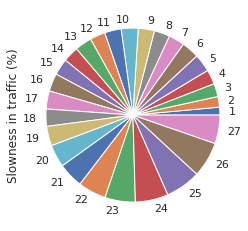

In [ ]:
df.groupby('Hour (Coded)')['Slowness in traffic (%)'].mean().plot(kind = "pie")
plt.show()

## Correlation
Correlation analysis is a statistical technique used to assess the relationship between two quantitative variables. It allows you to determine whether there is a linear relationship between the two variables and to what extent the relationship exists. The relationship between the two variables can be described using a correlation coefficient, which can range from -1 to 1. A correlation coefficient of -1 indicates a strong negative relationship, a correlation coefficient of 1 indicates a strong positive relationship, and a correlation coefficient of 0 indicates no relationship. Correlation analysis is often used in fields such as finance, economics, and psychology to understand the relationship between different variables. It can also be used in scientific research to understand the relationship between different variables and to make predictions about future outcomes.

In exploratory data analysis, correlation analysis can be used to understand the relationships between different variables in a dataset. It is a useful tool for identifying patterns and trends in the data, and can help you to understand the underlying structure of the data.

For example, if you are conducting an analysis of financial data, you might use correlation analysis to understand the relationship between different economic indicators, such as GDP and unemployment rate. By understanding the relationships between these variables, you can gain insights into how economic conditions might impact other variables, such as stock prices or consumer spending.

Correlation analysis can also be used in combination with other techniques, such as regression analysis, to make predictions about future outcomes based on the relationships identified in the data. However, it is important to keep in mind that correlation does not necessarily imply causation, and it is always important to consider other factors that may be influencing the relationships observed in the data.

In [ ]:
#
corr = df.corr()
corr

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
Hour (Coded),1.000000,0.079577,0.136807,-0.095347,0.181008,0.008261,0.122002,0.011091,-0.011091,0.238412,-0.044364,0.245033,-0.021446,-0.200471,-0.096911,0.183065,-0.165312,0.729962
Immobilized bus,0.079577,1.000000,0.141517,0.175262,0.025638,0.246290,0.086644,0.086644,0.218071,0.057134,-0.044782,-0.054769,0.082074,0.019847,-0.002430,0.005055,0.029712,0.101143
Broken Truck,0.136807,0.141517,1.000000,-0.059513,0.264286,0.117450,0.009904,0.088556,0.088556,0.107544,0.009904,0.142570,0.087644,0.040531,-0.008000,0.220850,-0.041765,0.131998
Vehicle excess,-0.095347,0.175262,-0.059513,1.000000,0.082586,-0.059963,-0.015095,-0.015095,-0.015095,-0.041205,-0.015095,-0.029158,-0.040864,0.004362,-0.037686,-0.047592,-0.021428,-0.045297
Accident victim,0.181008,0.025638,0.264286,0.082586,1.000000,0.038484,0.071968,-0.052592,0.071968,0.111446,-0.052592,0.048789,-0.094200,0.077375,-0.079469,0.134497,-0.074656,0.121730
Running over,0.008261,0.246290,0.117450,-0.059963,0.038484,1.000000,-0.029644,-0.029644,-0.029644,-0.038246,-0.029644,-0.027065,0.016480,0.008567,0.030065,-0.093461,0.135446,-0.001133
Fire vehicles,0.122002,0.086644,0.009904,-0.015095,0.071968,-0.029644,1.000000,-0.007463,-0.007463,-0.020370,-0.007463,-0.014415,-0.020202,-0.024311,-0.018631,-0.023528,-0.010593,0.134103
Occurrence involving freight,0.011091,0.086644,0.088556,-0.015095,-0.052592,-0.029644,-0.007463,1.000000,-0.007463,-0.020370,-0.007463,-0.014415,0.369406,-0.024311,-0.018631,0.163313,-0.010593,0.026791
Incident involving dangerous freight,-0.011091,0.218071,0.088556,-0.015095,0.071968,-0.029644,-0.007463,-0.007463,1.000000,-0.020370,-0.007463,-0.014415,0.369406,-0.024311,-0.018631,-0.023528,-0.010593,0.000957
Lack of electricity,0.238412,0.057134,0.107544,-0.041205,0.111446,-0.038246,-0.020370,-0.020370,-0.020370,1.000000,-0.020370,0.334149,-0.055144,-0.030237,-0.050855,0.605162,-0.028916,0.436569


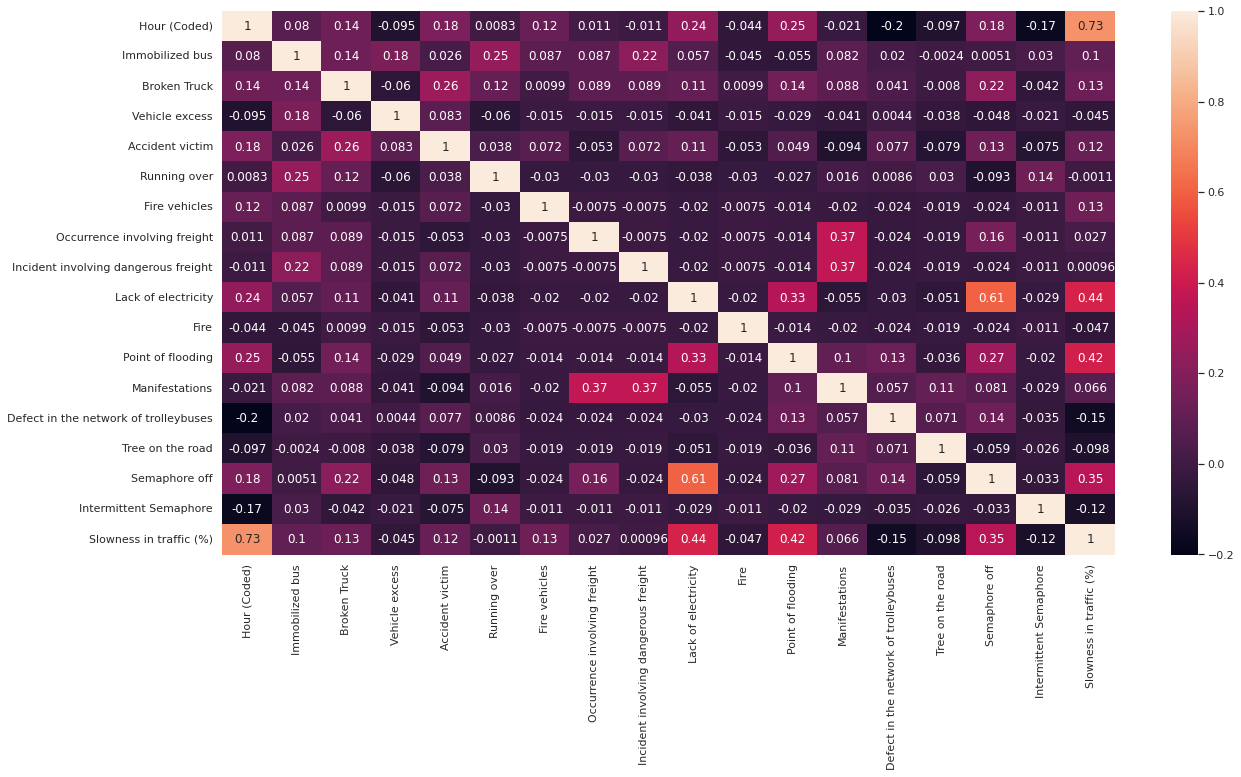

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot = True)

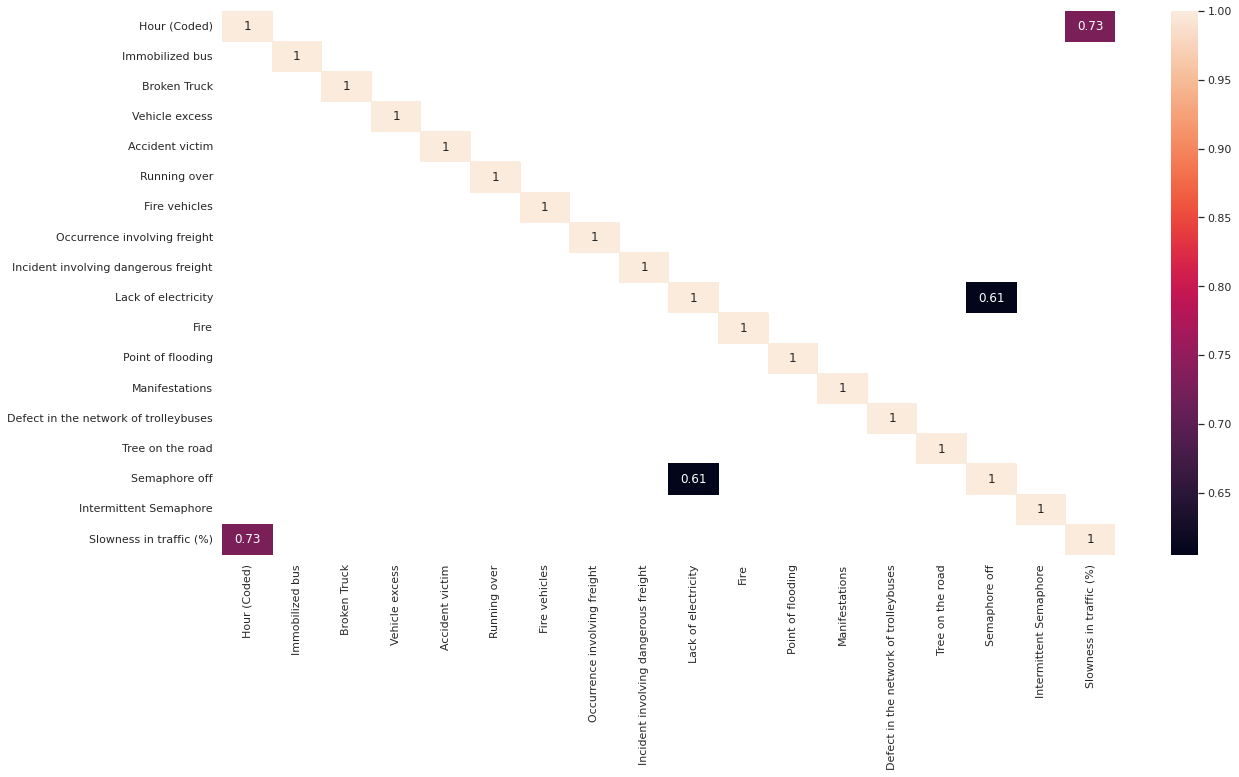

In [ ]:
# Conditional Correlation Analysis
# Can be used to denote/mark out desired or undesired values
plt.figure(figsize = (20,10))
sns.heatmap(corr[corr > 0.5], annot = True)

## Detecting Skewness using Histograms

We can use a hist plot to detect the presence and type of skewness of data.

Text(0, 0.5, 'Count')

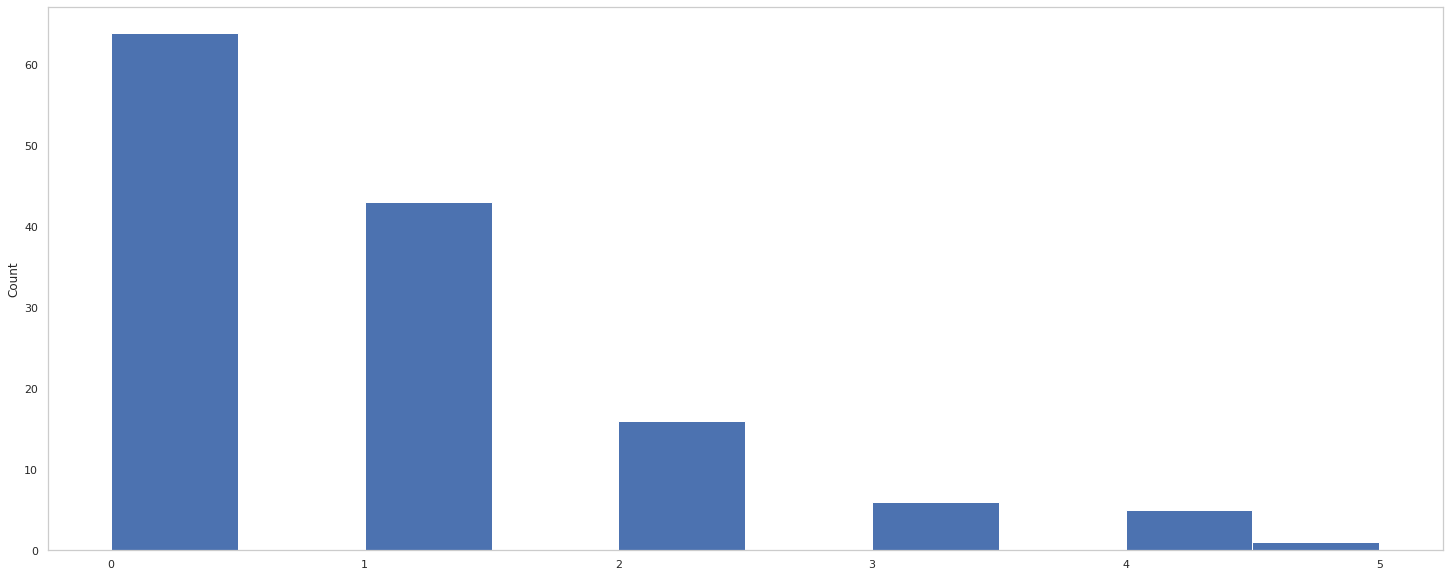

In [ ]:
plt.figure(figsize = (25,10)) # The "canvas" on which our plot will rest!
df['Broken Truck'].hist(grid = False) # setting grid = True will add grid lines to the plot
plt.ylabel('Count') # The label on the y-axis

The plot above shows that the data in this variable is right-skewed. We could use logarithmic transformation to normalize data to approximately conform with normal circumstances. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

In probability theory, a log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution.
[This article serves as inspiration behind this section.](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/)

Note that you CANNOT perform logarithmic transformation on categorical values, even if such values are represented by integers.

##Scatter Plots

Instead of points being joined by lines, here the points are represented individually with a dot, circle, or other shape. These points are not connected, and these points are the (graphical) positional representations of the data points in the (usually) structured dataset. Scatter plots are used to observe the relationship between variables.

So, how do we create a scatter plot?

Here is the general syntax:


```
matplotlib.pyplot.scatter(x_axis_data, y_axis_data, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 
```
You can check the [Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for more details on the parameters.

If you wish to use a categorical variable in your dataset for your colour scale, then you first create a "colours" variable and equate it to the desired target variable, e.g:


```
colours = df['Category']
plt.scatter(x, y, c=colours, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show colour scale
```
The cmap variable is to denote what colour scheme you are using for your colour scale/map.

The last line is fairly self-explanatory, as it shows you the colour scale.





Text(0, 0.5, 'Semaphore off')

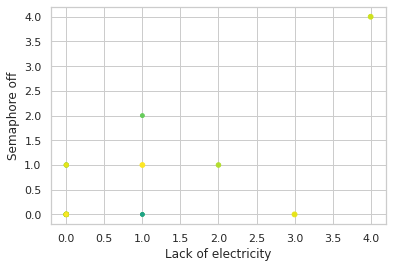

In [ ]:
x = df['Lack of electricity']
y = df['Semaphore off']
colours = df['Hour (Coded)']
size = df['Slowness in traffic (%)'] 

plt.scatter(x, y, c = colours, s = size, cmap = 'viridis')
plt.xlabel('Lack of electricity')
plt.ylabel('Semaphore off')

That's all, for now... In another notebook, I'll try to explore deeper into data analysis with Python.

Or maybe, I'll convert this into a post...either way, oh well! 